# Etapa 2 - Pré-processamento
## Problemas encontrados com a base:
- Na realização da primeira etapa do trabalho prático onde precisávamos apenas treinar um dos modelos de classificação aprendidos nas aulas em nossa base de dados escolhida, notamos que a base não possui dados ausentes, o que nos dá o privilégio de saltar uma das etapas do pré-processamento, mas notamos que a base está muito desbalanceada, tendo em vista que temos 3 classificações possíveis e aqui está a quantidade de cada uma das instâncias da nossa base de dados:

 - positive: 399

 - neutral: 37

 - negative: 64

 - Total de instâncias: 500

# Task: 1
## - Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from math import sqrt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Task 2:
## Open DataFrame

In [4]:
df = pd.read_csv("/content/Reviews_Classified.csv")
df = df.drop(columns="Unnamed: 0")

In [5]:
word_count=pd.value_counts(df['Classification'].values, sort=False)
y=df['Classification']
word_count

positive    399
negative     64
neutral      37
dtype: int64

# Task 3:
## - Ballance Data Frame
## - From 500 instances to 1197

In [6]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(df, y)
df = X_over
# summarize class distribution
print(Counter(y_over))

Counter({'positive': 399, 'negative': 64, 'neutral': 37})
Counter({'positive': 399, 'negative': 399, 'neutral': 399})


# Task 4:
## - Remove stopwords from text

In [7]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [8]:
corpus= []
corpus1= []
for i in range(0, df.shape[0]):
    corpus.append(review_to_words(df['Text'][i]))
    corpus1.append(review_to_words(df['Text'][i]))

df['new_Phrase']=corpus
df.drop(['Text'],axis=1,inplace=True)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = df.iloc[:,1].values

# Task 5:
## - Train NaiveBayes Multinomial

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

In [11]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

VP neg:307	VP neu:338	VP pos:359
FN neg:92	FN neu:61	FN pos:40
FP neg:27	FP neu:27	FP pos:139
VN neg:771	VN neu:771	VN pos:659
              precision    recall  f1-score   support

    negative       0.92      0.77      0.84       399
     neutral       0.93      0.85      0.88       399
    positive       0.72      0.90      0.80       399

    accuracy                           0.84      1197
   macro avg       0.86      0.84      0.84      1197
weighted avg       0.86      0.84      0.84      1197



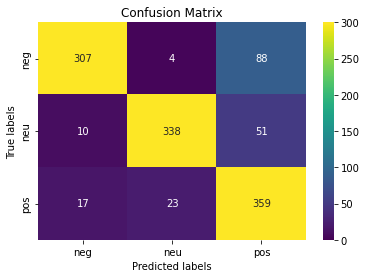

In [12]:
cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=300); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);